# Schooling Years Analysis

The purpose of this EDA is to assess the average and key metrics to uncover patterns in 193 countries around the world on schooling years.

## Initial Steps

**a)** First, our goal is to succesfully load the data and then have it cleaned so it can be used properly.

**b)** We will check for null values and duplicated records.

**c**) Moving on, getting the year and unpivot the data are the next steps.

**d)** Comments are made in each snippet to make it easier to follow along each piece of code.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import plotly.express as px
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/years-of-schooling-worldwide/schooling.csv


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/kaggle/input/years-of-schooling-worldwide/schooling.csv')
df.head(5)

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),Expected Years of Schooling (1993),Expected Years of Schooling (1994),Expected Years of Schooling (1995),Expected Years of Schooling (1996),Expected Years of Schooling (1997),Expected Years of Schooling (1998),Expected Years of Schooling (1999),Expected Years of Schooling (2000),Expected Years of Schooling (2001),Expected Years of Schooling (2002),Expected Years of Schooling (2003),Expected Years of Schooling (2004),Expected Years of Schooling (2005),Expected Years of Schooling (2006),Expected Years of Schooling (2007),Expected Years of Schooling (2008),Expected Years of Schooling (2009),Expected Years of Schooling (2010),Expected Years of Schooling (2011),Expected Years of Schooling (2012),Expected Years of Schooling (2013),Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2.50405,2.80655,3.10905,3.41155,3.714050,4.016550,4.319050,4.621550,4.924050,5.226550,5.529050,5.831550,6.134050,6.436550,7.393880,7.660418,7.926956,8.193494,8.460032,8.726570,9.002690,9.278810,9.577323,9.875836,10.174350,10.180150,10.185950,10.191750,10.197550,10.263844,10.263844,10.263844
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,3.53748,3.32483,3.30209,3.38587,3.469650,3.553430,3.637210,3.720990,3.804770,4.207226,4.609682,5.012138,5.414593,5.817049,6.219505,6.621961,7.024417,7.426873,7.829328,8.231784,8.634240,9.560080,10.082500,10.604900,11.127300,11.649700,12.172090,12.172100,12.172100,12.172100,12.172100,12.172100
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,11.60293,11.76358,10.66378,10.12650,10.091150,10.166170,10.228450,10.505080,10.669440,10.684940,10.589480,10.684410,10.701520,10.904710,10.884790,11.419280,11.582050,11.964230,12.124880,12.263760,12.999970,13.748450,14.586650,14.925640,15.252420,15.076300,14.804600,14.816130,14.695620,14.818920,14.448000,14.448000
3,AND,Andorra,Europe,Northern Hemisphere,Very High,NaN,40.0,10.79878,10.79878,10.79878,10.79878,10.798780,10.798780,10.798780,10.798780,10.798780,10.798780,10.798780,10.798780,11.036580,10.942530,10.791990,10.825930,11.182770,11.182770,11.671920,11.671920,11.671920,11.671920,13.524016,13.138841,13.495076,13.140280,13.300239,13.046476,13.300239,13.300239,13.300239,13.300239
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,10.47456,10.82239,10.65938,10.68766,10.806515,10.925369,11.044223,11.163078,11.281932,11.400786,11.519641,11.638495,11.757349,11.876204,11.995058,12.113912,12.232767,12.351621,12.470476,12.589330,12.708184,12.827039,12.945893,13.064747,13.183602,13.302456,13.421310,14.344100,15.019120,15.694140,15.717690,15.717690


In [4]:
df.shape

(195, 39)

In [5]:
df[df.duplicated()].shape

(0, 39)

In [6]:
df.isnull().sum()

ISO3                                   0
Country                                0
Continent                              0
Hemisphere                             0
Human Development Groups               4
UNDP Developing Regions               44
HDI Rank (2021)                        4
Expected Years of Schooling (1990)    24
Expected Years of Schooling (1991)    24
Expected Years of Schooling (1992)    24
Expected Years of Schooling (1993)    24
Expected Years of Schooling (1994)    24
Expected Years of Schooling (1995)    20
Expected Years of Schooling (1996)    20
Expected Years of Schooling (1997)    20
Expected Years of Schooling (1998)    20
Expected Years of Schooling (1999)    18
Expected Years of Schooling (2000)     9
Expected Years of Schooling (2001)     9
Expected Years of Schooling (2002)     7
Expected Years of Schooling (2003)     7
Expected Years of Schooling (2004)     7
Expected Years of Schooling (2005)     6
Expected Years of Schooling (2006)     6
Expected Years o

In [7]:
df.loc[df['HDI Rank (2021)'].isnull()]

,ISO3,Country,Continent,Hemisphere,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Expected Years of Schooling (1990),Expected Years of Schooling (1991),Expected Years of Schooling (1992),Expected Years of Schooling (1993),Expected Years of Schooling (1994),Expected Years of Schooling (1995),Expected Years of Schooling (1996),Expected Years of Schooling (1997),Expected Years of Schooling (1998),Expected Years of Schooling (1999),Expected Years of Schooling (2000),Expected Years of Schooling (2001),Expected Years of Schooling (2002),Expected Years of Schooling (2003),Expected Years of Schooling (2004),Expected Years of Schooling (2005),Expected Years of Schooling (2006),Expected Years of Schooling (2007),Expected Years of Schooling (2008),Expected Years of Schooling (2009),Expected Years of Schooling (2010),Expected Years of Schooling (2011),Expected Years of Schooling (2012),Expected Years of Schooling (2013),Expected Years of Schooling (2014),Expected Years of Schooling (2015),Expected Years of Schooling (2016),Expected Years of Schooling (2017),Expected Years of Schooling (2018),Expected Years of Schooling (2019),Expected Years of Schooling (2020),Expected Years of Schooling (2021)
108,MCO,Monaco,Europe,Northern Hemisphere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NRU,Nauru,Oceania,Southern Hemisphere,NaN,EAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.54889,9.6908,9.31249,8.97517,9.07557,10.86083,10.1337,9.00228,9.5665,9.742472,9.921681,10.104186,10.290049,10.479331,10.672094,10.868403,11.068323,11.271921,11.479264,11.69042,11.69042,11.69042
142,PRK,North Korea,Asia,Northern Hemisphere,NaN,EAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.746180,10.777645,10.783170,10.783170,10.78317,10.78317,10.78317
158,SOM,Somalia,Africa,Northern Hemisphere,NaN,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Getting rid of countries with every year with null values
# Still, there will be countries with some years with null values, we will get into it deeper later
df.drop([108,158], inplace=True)

In [9]:
df.columns

Index(['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human Development Groups', 'UNDP Developing Regions',
       'HDI Rank (2021)', 'Expected Years of Schooling (1990)',
       'Expected Years of Schooling (1991)',
       'Expected Years of Schooling (1992)',
       'Expected Years of Schooling (1993)',
       'Expected Years of Schooling (1994)',
       'Expected Years of Schooling (1995)',
       'Expected Years of Schooling (1996)',
       'Expected Years of Schooling (1997)',
       'Expected Years of Schooling (1998)',
       'Expected Years of Schooling (1999)',
       'Expected Years of Schooling (2000)',
       'Expected Years of Schooling (2001)',
       'Expected Years of Schooling (2002)',
       'Expected Years of Schooling (2003)',
       'Expected Years of Schooling (2004)',
       'Expected Years of Schooling (2005)',
       'Expected Years of Schooling (2006)',
       'Expected Years of Schooling (2007)',
       'Expected Years of Schooling (2008)',
       'Exp

In [10]:
# Adding '_' in every column name
df.columns = df.columns.str.replace(' ', '_')

In [11]:
# Filling the null values in these columns for further exploration
df['Human_Development_Groups'].fillna(value='No Information', inplace=True)
df['UNDP_Developing_Regions'].fillna(value='Does not belong to developing regions', inplace=True)

In [12]:
# Replacing devevloping regions with full names

def region(i):
    return(
    df.loc[:, 'UNDP_Developing_Regions']
    .replace('SSA', 'Sub-Saharan Africa')
    .replace('LAC', 'Latin America and the Caribbean')
    .replace('EAP', 'East Asia and the Pacific')
    .replace('AS', 'Arab States')
    .replace('ECA', 'Europe and Central Asia')
    .replace('SA', 'South Asia')
    )

In [13]:
df= df.assign(UNDP_Developing_Regions=region)

In [14]:
df.sample(5)

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Expected_Years_of_Schooling_(1990),Expected_Years_of_Schooling_(1991),Expected_Years_of_Schooling_(1992),Expected_Years_of_Schooling_(1993),Expected_Years_of_Schooling_(1994),Expected_Years_of_Schooling_(1995),Expected_Years_of_Schooling_(1996),Expected_Years_of_Schooling_(1997),Expected_Years_of_Schooling_(1998),Expected_Years_of_Schooling_(1999),Expected_Years_of_Schooling_(2000),Expected_Years_of_Schooling_(2001),Expected_Years_of_Schooling_(2002),Expected_Years_of_Schooling_(2003),Expected_Years_of_Schooling_(2004),Expected_Years_of_Schooling_(2005),Expected_Years_of_Schooling_(2006),Expected_Years_of_Schooling_(2007),Expected_Years_of_Schooling_(2008),Expected_Years_of_Schooling_(2009),Expected_Years_of_Schooling_(2010),Expected_Years_of_Schooling_(2011),Expected_Years_of_Schooling_(2012),Expected_Years_of_Schooling_(2013),Expected_Years_of_Schooling_(2014),Expected_Years_of_Schooling_(2015),Expected_Years_of_Schooling_(2016),Expected_Years_of_Schooling_(2017),Expected_Years_of_Schooling_(2018),Expected_Years_of_Schooling_(2019),Expected_Years_of_Schooling_(2020),Expected_Years_of_Schooling_(2021)
60,GAB,Gabon,Africa,Southern Hemisphere,High,Sub-Saharan Africa,112.0,11.832130,11.874580,11.917030,11.959480,12.001930,12.044380,12.086830,12.129280,12.171730,12.150690,12.168755,12.186820,12.310021,12.333152,12.356283,12.379414,12.402546,12.425677,12.448808,12.471939,12.495070,12.518244,12.541461,12.564721,12.626916,12.689111,12.751305,12.813500,12.900000,12.977310,12.977310,12.977310
95,KWT,Kuwait,Asia,Northern Hemisphere,Very High,Arab States,50.0,10.941340,9.095980,7.250620,8.267810,9.852400,11.452290,12.997250,13.165250,13.211515,13.257780,12.993055,12.728330,13.014715,13.301100,13.496150,13.571117,13.646084,13.721051,13.796018,13.870985,13.945952,14.020919,14.095886,14.170853,14.245820,14.693980,14.849119,15.005896,15.164328,15.324433,15.324433,15.324433
191,YEM,Yemen,Asia,Northern Hemisphere,Low,Arab States,183.0,6.450827,6.593797,6.739936,6.889314,7.042002,7.198075,7.357606,7.520673,7.687354,7.857730,8.042290,8.226850,8.411410,8.595970,8.767920,8.804680,8.721573,8.638467,8.555360,8.633920,8.712480,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710,9.098710
71,GUY,Guyana,America,Northern Hemisphere,High,Latin America and the Caribbean,108.0,9.658160,9.760268,9.863455,9.967733,10.073114,10.179609,10.287229,10.395988,10.505896,10.616966,10.729210,10.785074,10.840937,10.896800,11.102040,11.307280,11.020625,10.733970,10.767080,10.678100,10.948890,11.476630,11.431130,11.578399,11.727565,11.878653,12.031688,12.186694,12.343697,12.502722,12.502722,12.502722
121,MRT,Mauritania,Africa,Northern Hemisphere,Medium,Sub-Saharan Africa,158.0,3.717260,3.828250,4.146910,4.642860,5.327490,5.474870,5.728160,5.780070,6.177780,6.384640,6.471035,6.557430,6.645000,6.777100,7.289490,7.332840,7.556080,7.436580,7.317080,7.794020,7.878290,7.977960,8.365590,8.676250,8.850930,9.025610,8.617940,8.588340,9.106390,9.376160,9.376160,9.376160


In [15]:
# Checking the replacements
df['UNDP_Developing_Regions'].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe and Central Asia',
       'Does not belong to developing regions', 'Arab States',
       'Latin America and the Caribbean', 'East Asia and the Pacific'],
      dtype=object)

In [16]:
# We want to shrink the number of columns, this will come in handy to perform aggregations in EDA

df = df.melt(id_vars=['ISO3', 'Country', 'Continent', 'Hemisphere',
       'Human_Development_Groups', 'UNDP_Developing_Regions',
       'HDI_Rank_(2021)'], var_name='Year', value_name='Expected_Years_of_Schooling')
df.sample(5)

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
3170,ISL,Iceland,Europe,Northern Hemisphere,Very High,Does not belong to developing regions,3.0,Expected_Years_of_Schooling_(2006),18.303370
1689,QAT,Qatar,Asia,Northern Hemisphere,Very High,Arab States,42.0,Expected_Years_of_Schooling_(1998),12.891980
2890,WSM,Samoa,Oceania,Southern Hemisphere,High,East Asia and the Pacific,111.0,Expected_Years_of_Schooling_(2004),12.087092
2714,BEL,Belgium,Europe,Northern Hemisphere,Very High,Does not belong to developing regions,13.0,Expected_Years_of_Schooling_(2004),18.364099
8,AUS,Australia,Oceania,Southern Hemisphere,Very High,Does not belong to developing regions,5.0,Expected_Years_of_Schooling_(1990),17.535079


In [17]:
# Now we want to extract the year and cast the dtype into an integer

def extract_year(text):
    match= re.search(r'\((\d{4})\)', text)
    if match:
        return int(match.group(1))
    else:
        return None
        

In [18]:
df['Year']= df['Year'].apply(extract_year)
df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [19]:
df.head(5)

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1990,2.50405
1,AGO,Angola,Africa,Southern Hemisphere,Medium,Sub-Saharan Africa,148.0,1990,3.53748
2,ALB,Albania,Europe,Northern Hemisphere,High,Europe and Central Asia,67.0,1990,11.60293
3,AND,Andorra,Europe,Northern Hemisphere,Very High,Does not belong to developing regions,40.0,1990,10.79878
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,Arab States,26.0,1990,10.47456


In [20]:
# We can see the records are sorted only by year, we will sort the df by country and year

df = df.sort_values(by=['Country', 'Year'], ascending=[True, True])
df.reset_index(inplace=True)
df.head()

,index,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
0,0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1990,2.50405
1,193,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1991,2.80655
2,386,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1992,3.10905
3,579,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1993,3.41155
4,772,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1994,3.71405


In [21]:
# Dropping the index column
df.drop(columns='index', inplace=True)
df.head(5)

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1990,2.50405
1,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1991,2.80655
2,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1992,3.10905
3,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1993,3.41155
4,AFG,Afghanistan,Asia,Northern Hemisphere,Low,South Asia,180.0,1994,3.71405


In [22]:
# We see, as mentioned previously, there are still records for 'Expected Years of Schooling' with null values

df.isnull().sum()

ISO3                             0
Country                          0
Continent                        0
Hemisphere                       0
Human_Development_Groups         0
UNDP_Developing_Regions          0
HDI_Rank_(2021)                 64
Year                             0
Expected_Years_of_Schooling    257
dtype: int64

In [23]:
# We will keep records with HDI Rank with null values to get better results in EDA, 
# since we don't have information about why these countries don't have a rank, besides, dropping these records would affect stats
df['HDI_Rank_(2021)'].unique()

array([180.,  67.,  91.,  40., 148.,  71.,  47.,  85.,   5.,  25.,  55.,
        35., 129.,  70.,  60.,  13., 123., 166., 127., 118.,  74., 117.,
        87.,  51.,  68., 184., 187., 128., 146., 151.,  15., 188., 190.,
        42.,  79.,  88., 156., 153.,  58.,  83.,  29.,  32.,   6., 171.,
       102.,  80.,  95.,  97., 125., 145., 176.,  31., 144., 175.,  99.,
        11.,  28., 112., 174.,  63.,   9., 133.,  33., 135., 182., 177.,
       108., 163., 137.,   4.,  46.,   3., 132., 114.,  76., 121.,   8.,
        22.,  30., 159., 110.,  19.,  56., 152., 136.,  50., 140.,  39.,
       168., 178., 104.,  16.,  17., 173., 169.,  62.,  90., 186.,  23.,
       131., 158.,  86., 134.,  96.,  49., 185., 149., 139.,  nan, 143.,
        10., 126., 189.,  78.,   2.,  54., 161., 106.,  61., 105.,  84.,
       116.,  34.,  38.,  53.,  52., 165.,  75.,  89., 111.,  44., 138.,
       170.,  72., 181.,  12.,  45., 155., 109., 191.,  27.,  73., 172.,
         7.,   1., 150., 122., 160.,  66., 179., 16

In [24]:
# Checking if there are inconsistencies with country names
df['Country'].unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Ic

In [25]:
df['Hemisphere'].unique()

array(['Northern Hemisphere', 'Southern Hemisphere'], dtype=object)

In [26]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6176 entries, 0 to 6175
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ISO3                         6176 non-null   object 
 1   Country                      6176 non-null   object 
 2   Continent                    6176 non-null   object 
 3   Hemisphere                   6176 non-null   object 
 4   Human_Development_Groups     6176 non-null   object 
 5   UNDP_Developing_Regions      6176 non-null   object 
 6   HDI_Rank_(2021)              6112 non-null   float64
 7   Year                         6176 non-null   int64  
 8   Expected_Years_of_Schooling  5919 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 434.4+ KB


## Exploratory Data Analysis

First we want to check wich countries contain years with null records

In [28]:
df.groupby(['Country'])['Expected_Years_of_Schooling'].apply(
    lambda x: x.isnull().sum()).reset_index(name='null_values').sort_values(by='null_values', ascending=False)[:10]

,Country,null_values
147,San Marino,28
125,North Korea,25
160,South Sudan,20
5,Antigua and Barbuda,17
178,Turkmenistan,15
172,Timor-Leste,12
106,Marshall Islands,12
110,Micronesia,10
130,Palau,10
118,Nauru,10


Let's create a list with the names of every country with null records

In [29]:
null_country_list = df.loc[(df['Expected_Years_of_Schooling'].isnull())].groupby(['Country'])
null_country_list = list(null_country_list.groups.keys())
null_country_list

['Antigua and Barbuda',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Cabo Verde',
 'Dominica',
 'Equatorial Guinea',
 'Eritrea',
 'Liberia',
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Micronesia',
 'Montenegro',
 'Nauru',
 'North Korea',
 'Palau',
 'Palestine, State of',
 'San Marino',
 'South Sudan',
 'Timor-Leste',
 'Turkmenistan',
 'Vanuatu']

Checking some stats and how many values are not null within the records for these countries

In [30]:
df.loc[(df['Country'].isin(null_country_list))].groupby(
    ['Country'])['Expected_Years_of_Schooling'].agg(
    [pd.Series.count, pd.Series.mean, pd.Series.mode]).sort_values(by='count')

,count,mean,mode
Country,,,
San Marino,4,12.096528,12.26614
North Korea,7,10.777096,10.78317
South Sudan,12,5.374788,5.54251
Antigua and Barbuda,15,14.652687,14.184626
Turkmenistan,17,11.569911,13.2104
Timor-Leste,20,12.074404,"[12.39822, 12.616098]"
Marshall Islands,20,11.106879,10.23932
Liechtenstein,22,14.611581,15.18157
Equatorial Guinea,22,8.527035,9.73494


We want more precise stats

In [31]:
df.loc[(df['Country'].isin(null_country_list))].groupby(
    ['Continent', 'Country'])['Expected_Years_of_Schooling'].agg([('non_null_values_%', lambda x: (x.count()/x.size)*100), 
    'count', 'mean', 'median', ('mode', pd.Series.mode)]).sort_values(by=['Continent'])

non_null_values_%  count       mean  \
Continent Country                                                       
Africa    Cabo Verde                         68.750     22  12.454237   
          Equatorial Guinea                  68.750     22   8.527035   
          Eritrea                            84.375     27   7.478260   
          Liberia                            71.875     23  10.060735   
          South Sudan                        37.500     12   5.374788   
America   Antigua and Barbuda                46.875     15  14.652687   
          Bahamas                            84.375     27  12.417838   
          Dominica                           68.750     22  13.050620   
Asia      Turkmenistan                       53.125     17  11.569911   
          Timor-Leste                        62.500     20  12.074404   
          Palestine, State of                84.375     27  12.508280   
          North Korea                        21.875      7  10.777096   
          Maldives                           84.375     27  11.985079   
Europe    Bosnia and Herzegovina             68.750     22  13.271243   
          Liechtenstein                      68.750     22  14.611581   
          Montenegro                         68.750     22  14.163045   
          San Marino                         12.500      4  12.096528   
Oceania   Marshall Islands                   62.500     20  11.106879   
          Micronesia                         68.750     22  11.062215   
          Nauru                              68.750     22  10.324328   
          Palau                              68.750     22  15.608840   
          Vanuatu                            71.875     23  10.917611   

                                     median                        mode  
Continent Country                                                        
Africa    Cabo Verde              12.563022                   12.554614  
          Equatorial Guinea        8.546108                     9.73494  
          Eritrea                  8.057061                    8.064525  
          Liberia                 10.051437  [9.853167972, 10.42078972]  
          South Sudan              5.542510                     5.54251  
America   Antigua and Barbuda     14.662058                   14.184626  
          Bahamas                 12.426582        [12.82263, 12.89945]  
          Dominica                13.061210                   13.319186  
Asia      Turkmenistan            11.751581                     13.2104  
          Timor-Leste             12.422550       [12.39822, 12.616098]  
          Palestine, State of     13.172030                    13.35801  
          North Korea             10.783170                    10.78317  
          Maldives                12.311316                    12.63561  
Europe    Bosnia and Herzegovina  13.593807                        13.8  
          Liechtenstein           14.627990                    15.18157  
          Montenegro              14.919981                    15.08161  
          San Marino              12.113540                    12.26614  
Oceania   Marshall Islands        11.089868                    10.23932  
          Micronesia              11.184233                    11.54948  
          Nauru                   10.211875                    11.69042  
          Palau                   15.801303                    15.78432  
          Vanuatu                 10.973405                   11.535315

We see several differences between countries with null records. We will perform a replacement of these values with the median of each coutry, since it's between the mean and mode, as shown above.
However, we will store the replacement in a separate dataframe to see the key differences in stats and then compare each df.

In [32]:
df2 = df.copy()
median_for_null_values = df.groupby(['Country'])['Expected_Years_of_Schooling'].transform('median')
df2['Expected_Years_of_Schooling'] = df2['Expected_Years_of_Schooling'].fillna(median_for_null_values)

In [33]:
# Key stats for df without filling null values
df.groupby(
    ['Continent'])['Expected_Years_of_Schooling'].agg(['mean','min','max', ('mode', lambda x: x.mode().iloc[0])])

,mean,min,max,mode
Continent,,,,
Africa,9.115918,2.059570,15.821394,5.54251
America,12.969064,6.506765,18.869200,12.81608
Asia,11.769207,2.504050,18.338221,9.09871
Europe,14.891874,7.134404,20.028790,10.79878
Oceania,12.647423,3.784030,23.088921,11.54948


In [34]:
# Key stats for df2
df2.groupby(
    ['Continent'])['Expected_Years_of_Schooling'].agg(['mean','min','max', ('mode', lambda x: x.mode().iloc[0])])

,mean,min,max,mode
Continent,,,,
Africa,9.092587,2.059570,15.821394,5.542510
America,12.993162,6.506765,18.869200,14.662058
Asia,11.764519,2.504050,18.338221,10.783170
Europe,14.822579,7.134404,20.028790,12.113540
Oceania,12.555447,3.784030,23.088921,11.089868


As we can expect, there are differences, particularly in the mode. Generally, expected years in schooling tend to increase year by year or at least that is the notion we have. Therefore, filling null values with the median is not the best option. We will work with df.

In [35]:
# Checking some other interesting facts in the countries with null values

df.loc[(df['Country'].isin(null_country_list))].groupby(
    ['Continent']).agg(
    {'Country': 'nunique', 
     'Expected_Years_of_Schooling': 'mean'})

,Country,Expected_Years_of_Schooling
Continent,,
Africa,5,9.050899
America,3,13.159149
Asia,5,11.989153
Europe,4,13.905646
Oceania,5,11.808634


In [36]:
df.loc[(df['Country'].isin(null_country_list))].groupby(
    ['Continent','Human_Development_Groups', 'UNDP_Developing_Regions'])['Country'].nunique()

Continent  Human_Development_Groups  UNDP_Developing_Regions              
Africa     Low                       Sub-Saharan Africa                       3
           Medium                    Sub-Saharan Africa                       2
America    High                      Latin America and the Caribbean          2
           Very High                 Latin America and the Caribbean          1
Asia       High                      Arab States                              1
                                     Europe and Central Asia                  1
                                     South Asia                               1
           Medium                    East Asia and the Pacific                1
           No Information            East Asia and the Pacific                1
Europe     High                      Europe and Central Asia                  1
           Very High                 Does not belong to developing regions    2
                                     Europe a

Africa has, in countries with null values, the lowest mean in schooling years and is ranking lowest in Human Development Groups.

We will check wheter this pattern repeats with the complete dataset.

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HDI_Rank_(2021),6112.0,95.811518,55.166873,1.00000,48.000000,96.000000,144.000000,191.000000
Year,6176.0,2005.500000,9.233840,1990.00000,1997.750000,2005.500000,2013.250000,2021.000000
Expected_Years_of_Schooling,5919.0,11.991060,3.385642,2.05957,10.023569,12.252354,14.356868,23.088921


In [38]:
df.loc[(df['Expected_Years_of_Schooling']==df['Expected_Years_of_Schooling'].max())]

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
281,AUS,Australia,Oceania,Southern Hemisphere,Very High,Does not belong to developing regions,5.0,2015,23.088921


In [39]:
df.loc[(df['Expected_Years_of_Schooling']==df['Expected_Years_of_Schooling'].min())]

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Year,Expected_Years_of_Schooling
3936,NER,Niger,Africa,Northern Hemisphere,Low,Sub-Saharan Africa,189.0,1990,2.05957


Some insights here:

The HDI Rank seems to influence or have a relationship with schooling years.

Earliest year, being 1990, has the lowest value for schooling years. As mentioned before, this parameter may seem to increase year by year.

Africa is the continent with the lowest record. More exploration will be performed on this insight.

In [40]:
px.histogram(df['Expected_Years_of_Schooling'], template='plotly_dark', title='Schooling Years Distribution')

The distribution seems to be platykurtic.

In [41]:
px.box(df['Expected_Years_of_Schooling'], template='plotly_dark')

Lowest outliers, ranging from 2.05 to 3.46, correspond to the earliest records as seen previously.

Highest outliers, ranging from 20.9 to 23, correspond to latest records.



In [42]:
fig = px.bar(x= df.groupby(['Continent'])['Country'].nunique().index,
       y= df.groupby(['Continent'])['Country'].nunique().values, 
        template='plotly_dark', title ='Number of Countries by Continent')
fig.update_xaxes(title_text = '', categoryorder='total descending')
fig.update_yaxes(title_text = '')


In [43]:
mean_by_continent= df.groupby(
    ['Continent', 'Year'])['Expected_Years_of_Schooling'].mean().reset_index(name='mean')
px.line(mean_by_continent, x='Year', y='mean', color= 'Continent', template='plotly_dark',
       title='Mean Schooling Years by Continent Through Years')

There is a pattern, which indicates an increase in schooling years accross time.

Africa is in the lowest range and has almost doubled while Europe is leading.

In [44]:
px.scatter(df, x='Year', y ='Expected_Years_of_Schooling', template='plotly_dark')

Growth pattern remains through years.

In [45]:
# Adding an extra column to compute the difference with previous record

df['Growth'] = df.groupby(['Country'])['Expected_Years_of_Schooling'].diff()

In [46]:
top_negative_growth = df[['Country','Year', 'Growth']].sort_values(by='Growth')[0:10]
top_negative_growth

,Country,Year,Growth
5367,Syrian Arab Republic,2013,-3.752211
5294,Sweden,2004,-2.587840
4470,Qatar,2012,-1.925460
2849,Kuwait,1991,-1.845360
2850,Kuwait,1992,-1.845360
4885,Seychelles,2011,-1.541531
284,Australia,2018,-1.445091
5754,Tuvalu,2016,-1.439790
4880,Seychelles,2006,-1.388660
1838,Finland,2004,-1.226519


In [47]:
fig = px.bar(top_negative_growth, x='Country', y='Growth',text='Year', template='plotly_dark', title='Negative Growth in Countries in Years')
fig.update_xaxes(categoryorder='total descending')

Though, there are years with negative growth. More information is needed for every country and specific years.

Australia has the highest record in 2015, but in 2018 we see a downfall. It would be interesting to know why this happened.

We can see other European countries.

Two contries appear twice, one from Africa and the other one from Asia.

In [48]:
top_positive_growth = df[['Country','Year', 'Growth']].sort_values(by='Growth', ascending=False)[0:10]
top_positive_growth

,Country,Year,Growth
3237,Malawi,1995,3.464270
1347,Cyprus,1993,3.028270
2536,Ireland,1998,2.597549
5464,Thailand,2014,2.549240
409,Bahrain,2015,2.303690
5303,Sweden,2013,2.286731
3844,Netherlands,1994,2.236440
1847,Finland,2013,2.234150
5687,Turkey,2013,2.038040
5879,United Kingdom,2013,1.960991


In [49]:
fig = px.bar(top_positive_growth, x='Country', y='Growth',text='Year', template='plotly_dark', title='Top Growing Countries in Years')
fig.update_xaxes(categoryorder='total ascending')

This is noticeable, Malawi, located in Africa, has the highest growth.

The majority of growths are from European countries.

<Axes: xlabel='Expected_Years_of_Schooling', ylabel='Continent'>

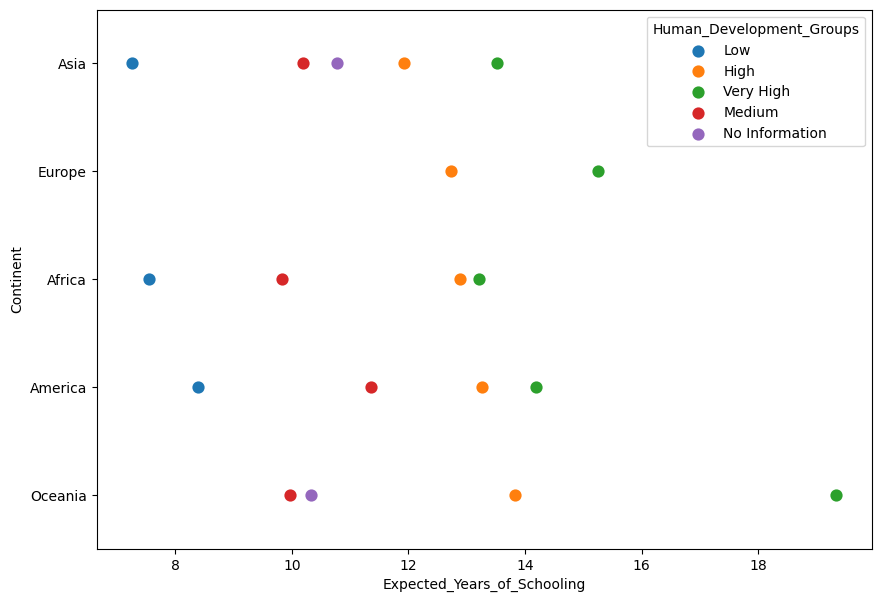

In [50]:
plt.figure(figsize=(10,7))
sns.pointplot(df, x='Expected_Years_of_Schooling', y='Continent', hue='Human_Development_Groups', estimator=np.mean,
             join=False, errorbar=None)


Highest Human Development Groups in Africa have a mean of expected schooling years almost equal to the high groups in other continents.

Asia and Africa have the lowest expected mean years in schooling in the low group.

<Axes: xlabel='Expected_Years_of_Schooling', ylabel='Human_Development_Groups'>

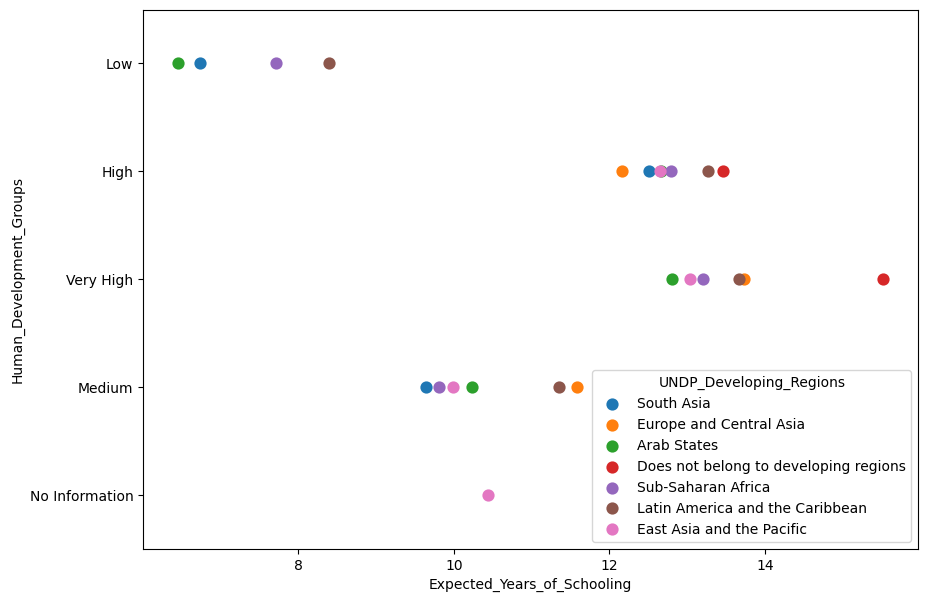

In [51]:
plt.figure(figsize=(10,7))
sns.pointplot(df, x='Expected_Years_of_Schooling', y='Human_Development_Groups', hue='UNDP_Developing_Regions', estimator=np.mean,
             join=False, errorbar=None)

Lowest mean expected years in schooling are from Arab States in Development Groups, along South Asia.

Non-developing regions have the highest mean in expected schooling years.



In [52]:
mean_values = df.groupby(['Continent', 'HDI_Rank_(2021)'])['Expected_Years_of_Schooling'].mean().reset_index()
px.scatter(mean_values, x='HDI_Rank_(2021)', y ='Expected_Years_of_Schooling', color='Continent', template='plotly_dark')

The higher the HDI Rank, the higher the expected years in schooling.

Oceania has less countries in the dataset but highest mean, while Africa the most values followed by Asia. Still, Africa demonstrates to have a preoccupying expectation in this field,having the lowest most repeated value. That is one of many factors why it is the poorest continent in the world.

Asia also has poor mean expected years, in fact, has the lowest values in the lowest groups, as seen in the pointplot section.

### Final Thoughts

**a)** As it has been noticed, several gaps were discovered between Africa and the rest of the world. Asia, as well, has countries with low schooling  prospect, tough we may see it as a continent with high development in this field, not all the main countries have high schooling parameters. Europe and America have similar statistics, however, it is different only seeing the numbers in comparison to the quality of education in each country and continent. Therefore, more research on this topic is needed. 

**b)** It is important to share this results with key organizations to consider new policies and focus on areas where not only education is a crucial fact. Many studies could be carried on on other factors, such as GDP per capita to better understand the full picture. Poverty levels across these countries and mortality rate have to be a priority, in order to tackle these inconsistencies all over the world. 